# Convolutional Autoencoder with MNIST

- fashion_mnist dataset 을 이용한 deep autoencoder 생성

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

# Convolutional autoencoder

<img src="https://drive.google.com/uc?export=view&id=15zh7bst9KKvciRdCvMAH7kXt3nNkABzO" width="75%" height="75%"/>

In [4]:
# 입력층 정의 (28x28 크기의 흑백 이미지)
input = Input(shape=(28, 28, 1))

# 인코더 부분
conv_1 = Conv2D(filters=64, kernel_size=(3,3),
                activation='relu', padding='same')(input)           # 첫 번째 컨볼루션 레이어, 64개의 필터 사용
maxpool_1 = MaxPooling2D(pool_size=(2,2))(conv_1)     # maxpooling을 사용하여 크기를 절반으로 줄임

conv_2 = Conv2D(filters=128, kernel_size=(3,3),
                activation='relu', padding='same')(maxpool_1)     # 두 번째 컨볼루션 레이어, 128개의 필터 사용
maxpool_2 = MaxPooling2D(pool_size=(2,2))(conv_2)        # maxpooling을 사용하여 크기를 다시 절반으로 줄임

bottle_neck = Conv2D(filters=256, kernel_size=(3,3),
                     activation='relu', padding='same')(maxpool_2)   # bottleneck 레이어, 256개의 필터 사용

# 디코더 부분
conv_3 = Conv2D(filters=128, kernel_size=(3,3),
                activation='relu', padding='same')(bottle_neck)       # 디코더의 첫 번째 컨볼루션 레이어, 128개의 필터 사용
upsample_3 = UpSampling2D(size=(2,2))(conv_3)                # 업샘플링을 사용하여 크기를 2배로 증가

conv_4 = Conv2D(filters=64, kernel_size=(3,3),
                activation='relu', padding='same')(upsample_3)      # 디코더의 두 번째 컨볼루션 레이어, 64개의 필터 사용
upsample_4 = UpSampling2D(size=(2,2))(conv_4)                 # 업샘플링을 사용하여 크기를 다시 2배로 증가

conv_5 = Conv2D(filters=1, kernel_size=(3,3),
                activation='sigmoid', padding='same')(upsample_4)    # 최종 레이어, 1개의 필터 사용하여 원본과 같은 크기의 흑백 이미지 출력

In [5]:
# autoencoder model
autoencoder = Model(inputs=input, outputs=conv_5)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# encoder model for visualization
encoder_viz = Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same')(bottle_neck)
encoder_model = Model(inputs=input, outputs=encoder_viz)

In [8]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         2951

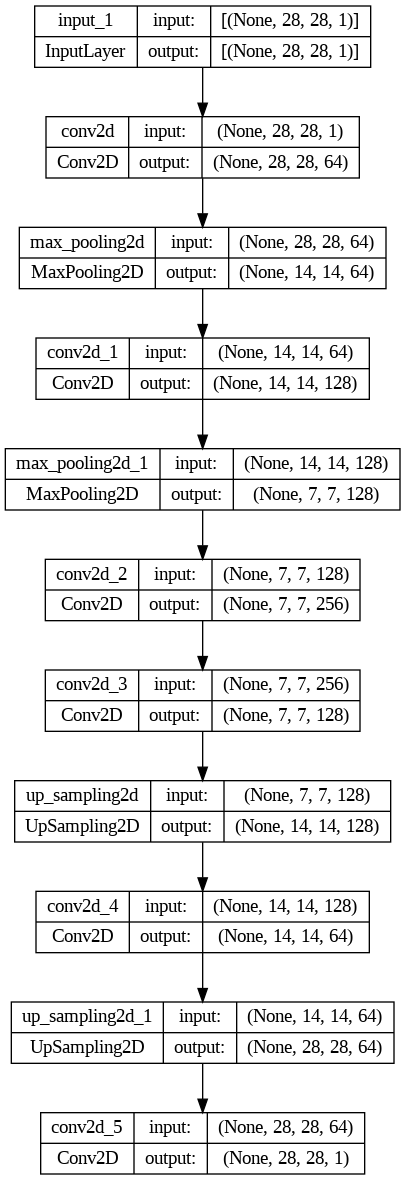

In [9]:
plot_model(autoencoder, show_shapes=True)

In [10]:
history = autoencoder.fit(X_train, X_train, epochs=50, shuffle=True,
                          batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 21s 29ms/step - loss: 0.3136 - val_loss: 0.2768
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 0.2698 - val_loss: 0.2685
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2635 - val_loss: 0.2634
Epoch 4/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2602 - val_loss: 0.2606
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2580 - val_loss: 0.2585
Epoch 6/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2560 - val_loss: 0.2571
Epoch 7/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2545 - val_loss: 0.2561
Epoch 8/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2534 - val_loss: 0.2548
Epoch 9/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2526 - val_loss: 0.2544
Epoch 10/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2518 - val_l

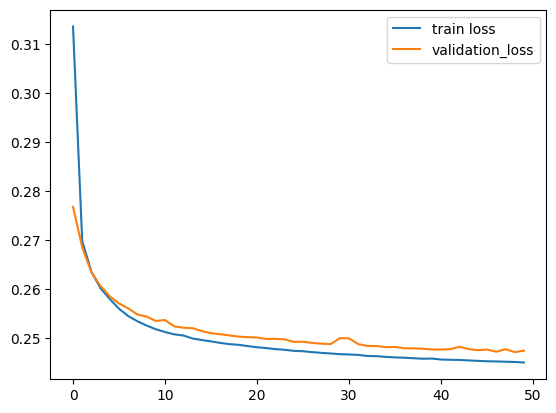

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

1/1 [==============================] - 0s 16ms/step


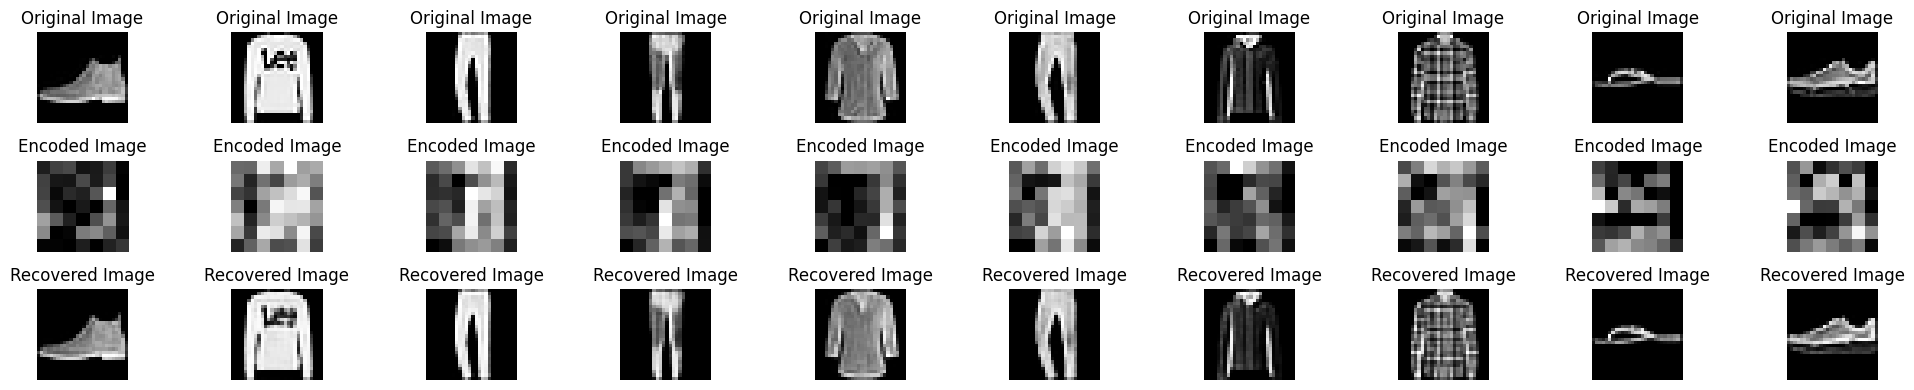

In [13]:
fig, ax = plt.subplots(3, 10, figsize=(20, 4))

# 10개의 이미지에 대해서 원본, 인코딩된 이미지, 복원된 이미지를 순서대로 그리기
for i in range(10):
    # 원본 이미지 그리기
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')  # 첫 번째 행에는 원본 이미지 표시
    ax[0, i].axis('off')     # 축 제거
    ax[0, i].set_title('Original Image')    # 타이틀 설정

    # 인코딩된 이미지 그리기
    img = np.expand_dims(X_test[i], axis=0)  # 모델의 입력에 맞게 차원 확장
    ax[1, i].imshow(encoder_model.predict(img).reshape(7, 7), cmap='gray')  # 두 번째 행에는 인코딩된 이미지 표시
    ax[1, i].axis('off')  # 축 제거
    ax[1, i].set_title('Encoded Image')  # 타이틀 설정

    # 복원된 이미지 그리기
    ax[2, i].imshow(autoencoder.predict(img).reshape(28, 28), cmap='gray')  # 세 번째 행에는 복원된 이미지 표시
    ax[2, i].axis('off')  # 축 제거
    ax[2, i].set_title('Recovered Image')  # 타이틀 설정

plt.tight_layout()
plt.show()

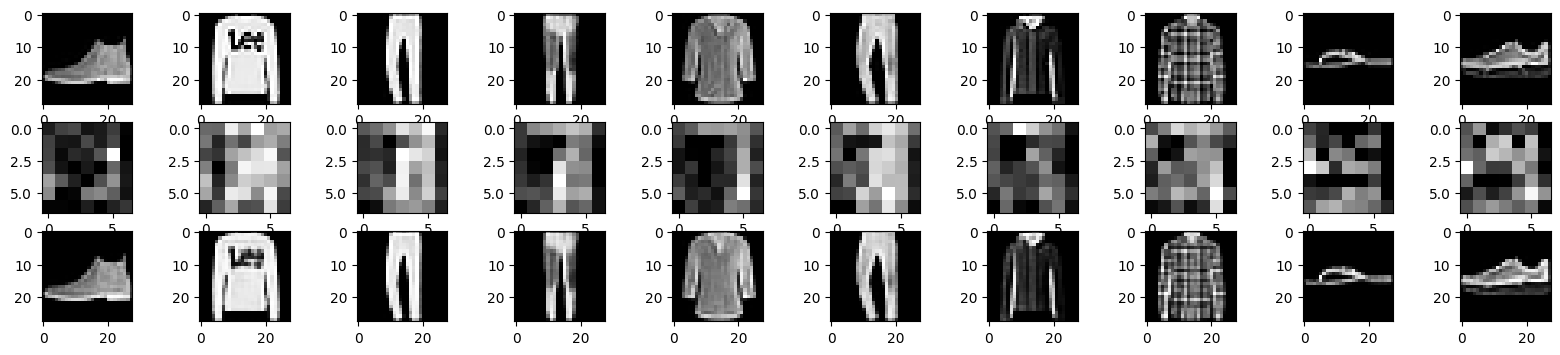

In [14]:
fig, ax = plt.subplots(3, 10, figsize=(20, 4))

for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    img = np.expand_dims(X_test[i], axis=0)
    ax[1, i].imshow(encoder_model.predict(img, verbose=0).reshape(7, 7), cmap='gray')
    ax[2, i].imshow(autoencoder.predict(img, verbose=0).reshape(28, 28), cmap='gray')